<a href="https://colab.research.google.com/github/yoo9519-AIdev/Learning/blob/master/%EB%8F%84%EB%A1%9C%EA%B5%90%ED%86%B5%EA%B3%B5%EB%8B%A8_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 시각화를 위한 폰트 설정

In [ ]:
plt.rc('font', family='AppleGothic') # Mac OS font
plt.rc('axes', unicode_minus=False) # minus 폰트 깨지는 것을 방지하기 위해서 False처리

# %matplotlib inline

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') # retina display 선명하게

## 데이터 불러오기

In [ ]:
data = pd.read_csv('/content/drive/My Drive/개인 datasets/도로교통공단_교통사고 정보_20200714.csv', low_memory=False, encoding='cp949')
print(data.shape)
data

(3233, 23)


,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,해운대구,차대사람,기타,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,안산시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,청도군,차대차,측면충돌,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,서구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,영천시,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019123105,야,화,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019123108,주,화,1,1,0,1,0,강원,양양군,차대차,추돌,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019123112,주,화,1,1,0,0,1,경북,칠곡군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019123112,주,화,1,1,0,1,0,울산,울주군,차대사람,횡단중,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


In [ ]:
data.head(10) # default = 5

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,해운대구,차대사람,기타,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,안산시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,청도군,차대차,측면충돌,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,서구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,영천시,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
5,2019,2019010203,야,수,1,1,1,0,0,충북,충주시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,특수차,화물차,1029070.0,1892384.0,127.826843,37.029538
6,2019,2019010206,주,수,1,0,0,0,0,인천,계양구,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,기타,929876.8,1947636.2,126.706400,37.525365
7,2019,2019010210,주,수,1,0,0,0,0,서울,중구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,건설기계,보행자,955430.0,1952240.0,126.995299,37.568449
8,2019,2019010210,주,수,1,0,0,0,0,경기,광주시,차대차,측면충돌,측면충돌,중앙선 침범,교차로,교차로부근,자전거,승용차,978481.0,1935323.0,127.256815,37.416794
9,2019,2019010215,주,수,1,0,0,0,0,충남,서천군,차량단독,전도,전도,안전운전 의무 불이행,단일로,기타단일로,화물차,없음,921337.0,1795200.0,126.625548,36.150677


In [ ]:
data.info()
# data.dtypes
# data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   int64  
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

## 결측치 처리

In [ ]:
data.isnull()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()
# 결측치 없음
null_count = data.isnull().sum()
null_count

발생년           0
발생년월일시        0
주야            0
요일            0
사망자수          0
부상자수          0
중상자수          0
경상자수          0
부상신고자수        0
발생지시도         0
발생지시군구        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       0
도로형태_대분류      0
도로형태          0
가해자_당사자종별     0
피해자_당사자종별     0
발생위치X_UTMK    0
발생위치Y_UTMK    0
경도            0
위도            0
dtype: int64

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

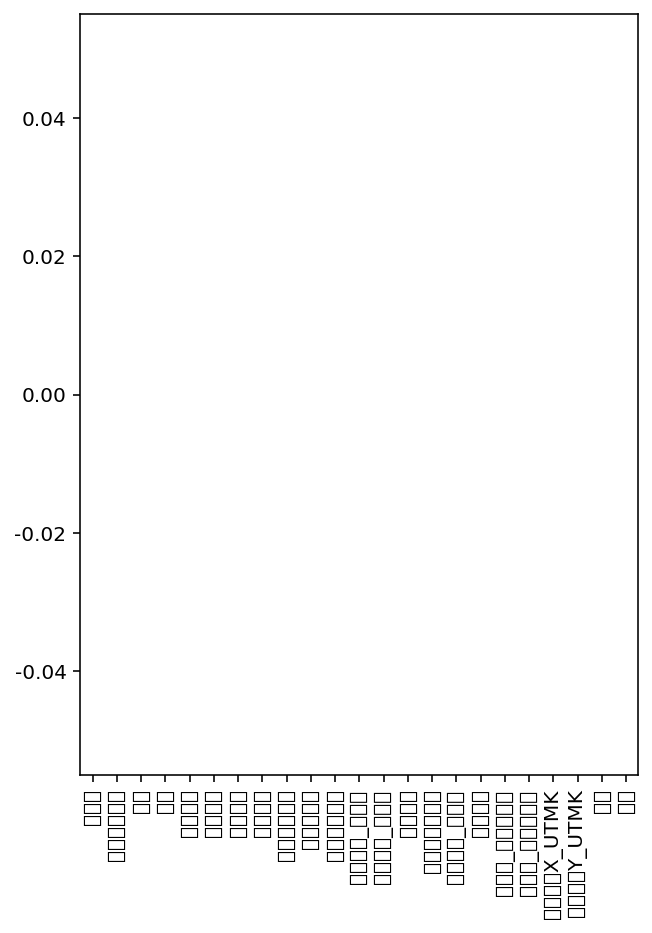

In [ ]:
# 결측치 그래프로 나타내기. 기본은 line
null_count.plot.bar(figsize=(5, 7)) # null_count.plot.barh() 는 x와 y축을 바꿔서 나타내준다. figsize=사이즈 조절
# 지금은 결측치가 없으므로, 그래프에 아무것도 표시되지 않는다.

In [ ]:
# 위에서 계산한 결측치 수를 인덱스(판다스) 형태로 나타내고 싶을 때 아래와 같은 코드를 쓰면 된다.
data_null_count = null_count.reset_index()
data_null_count

,index,0
0,발생년,0
1,발생년월일시,0
2,주야,0
3,요일,0
4,사망자수,0
5,부상자수,0
6,중상자수,0
7,경상자수,0
8,부상신고자수,0
9,발생지시도,0


컬럼명 변경하기

In [ ]:
# index 대신에 시각적으로 명시하는 방법
data_null_count.columns = ['컬럼명', '결측치수']
data_null_count

,컬럼명,결측치수
0,발생년,0
1,발생년월일시,0
2,주야,0
3,요일,0
4,사망자수,0
5,부상자수,0
6,중상자수,0
7,경상자수,0
8,부상신고자수,0
9,발생지시도,0


In [ ]:
# 결측치수 순으로 정렬
null_top10 = data_null_count.sort_values(by='결측치수', ascending=False).head(10) # ascending은 역순으로 나타내준다. head함수로 상위 10개만 출력
null_top10

,컬럼명,결측치수
0,발생년,0
12,사고유형_중분류,0
21,경도,0
20,발생위치Y_UTMK,0
19,발생위치X_UTMK,0
18,피해자_당사자종별,0
17,가해자_당사자종별,0
16,도로형태,0
15,도로형태_대분류,0
14,가해자법규위반,0


In [ ]:
data[['발생지시도']]

,발생지시도
0,부산
1,경기
2,경북
3,대전
4,경북
...,...
3228,서울
3229,강원
3230,경북
3231,울산


In [ ]:
# 결측치가 많은 컬럼은 삭제해 줄 것이다.
drop_columns = null_top10['컬럼명'].tolist()
drop_columns

['발생년',
 '사고유형_중분류',
 '경도',
 '발생위치Y_UTMK',
 '발생위치X_UTMK',
 '피해자_당사자종별',
 '가해자_당사자종별',
 '도로형태',
 '도로형태_대분류',
 '가해자법규위반']

## 제거하기

In [ ]:
print(data.shape)
data.drop(drop_columns, axis=1) # 추계값이 0, 컬럼 기준으로 삭제할 것이기 때문에 1
print(data.shape)

(3233, 23)
(3233, 23)


In [ ]:
data.info() # 삭제결과 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   int64  
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

In [ ]:
data

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,해운대구,차대사람,기타,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,안산시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,청도군,차대차,측면충돌,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,서구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,영천시,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019123105,야,화,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019123108,주,화,1,1,0,1,0,강원,양양군,차대차,추돌,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019123112,주,화,1,1,0,0,1,경북,칠곡군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019123112,주,화,1,1,0,1,0,울산,울주군,차대사람,횡단중,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


In [ ]:
data.describe(include=object)
# Describe to data(count, unique, top, freq)

,주야,요일,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
count,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233
unique,2,7,17,206,4,15,16,8,5,11,13,14
top,주,금,경기,창원시(통합),차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자
freq,1691,517,608,62,1318,694,694,2171,1943,1797,1514,1254
